<a href="https://colab.research.google.com/github/alanagadelha/Python-Training/blob/master/Alana_T4_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

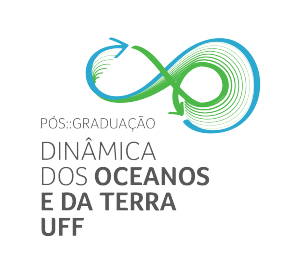

## <span style="color:red">Atividade 1</span>

### Será que podemos melhorar o ajuste dos dados utilizando um polinômio de mais alto grau, do tipo:

###$$s(\rho) = a_0 + b_1\,\rho + b_2\,\rho^2 + b_3\,\rho^3 + \cdots + b_N\,\rho^N$$

### Escolha $N>=3$ e reproduza o que foi feito em sala de aula, verificando se o ajuste diminui conforme aumenta N (Faça um gráfico $\phi$ versus $N$ para verificarmos na prática).


In [ ]:
## importando as bibliotecas e baixando o arquivo:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!mkdir arquivos
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id=1Oxz0TDc47H5vfT3cMKYXtqhEKUZu9Oyq" -O arquivos/DP1.txt
!pip install lasio

mkdir: cannot create directory ‘arquivos’: File exists
--2025-10-31 23:12:10--  https://docs.google.com/uc?export=download&id=1Oxz0TDc47H5vfT3cMKYXtqhEKUZu9Oyq
Resolving docs.google.com (docs.google.com)... 142.251.167.101, 142.251.167.138, 142.251.167.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.167.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Oxz0TDc47H5vfT3cMKYXtqhEKUZu9Oyq&export=download [following]
--2025-10-31 23:12:10--  https://drive.usercontent.google.com/download?id=1Oxz0TDc47H5vfT3cMKYXtqhEKUZu9Oyq&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c17::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2277494 (2.2M) [application/octet-stream]
Saving to: ‘arquivos/DP1.txt’

arquiv

##Comentário Alana - Abrindo o arquivo e plotando o dado, para uma rápida visualização. Vamos plotar RHOB X DEPT!

          SP    ILD    ILM    LL8       GR   CALI   DRHO   RHOB   NPHI     DT
DEPT                                                                         
100.0 -999.0 -999.0 -999.0 -999.0  25.1383 -999.0 -999.0 -999.0 -999.0 -999.0
100.5 -999.0 -999.0 -999.0 -999.0  24.7342 -999.0 -999.0 -999.0 -999.0 -999.0
101.0 -999.0 -999.0 -999.0 -999.0  24.9611 -999.0 -999.0 -999.0 -999.0 -999.0
101.5 -999.0 -999.0 -999.0 -999.0  25.1880 -999.0 -999.0 -999.0 -999.0 -999.0
102.0 -999.0 -999.0 -999.0 -999.0  25.4148 -999.0 -999.0 -999.0 -999.0 -999.0


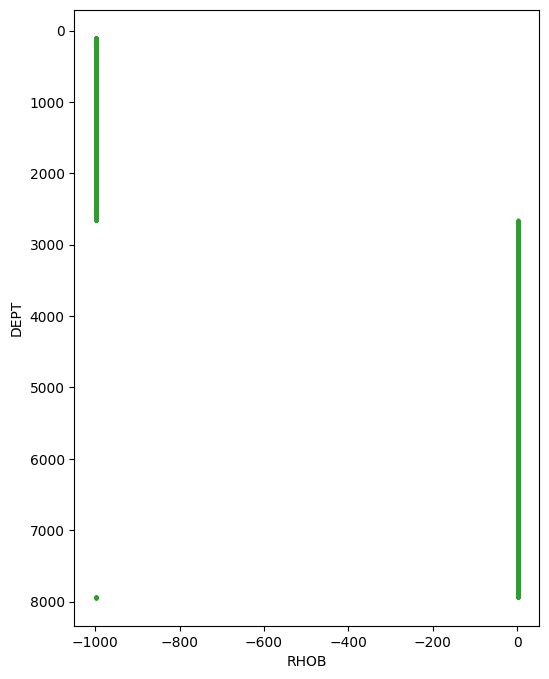

In [ ]:
import lasio

las = lasio.read("arquivos/DP1.txt")
df = las.df()
print(df.head())

####Plote########
plt.figure(figsize=(6,8))
plt.scatter(df.RHOB, df.index, s=3, c="tab:green")
plt.xlabel("RHOB")
plt.ylabel("DEPT")
# Invertendo o eixo Y (0 em cima, aumentando para baixo)
plt.gca().invert_yaxis()
plt.show()


##Verificamos que a visualização NÃO ficou boa, pois há muitos números zeros ou -999.00;
## Por isso, vamos tratar os dados abaixo!

In [ ]:
# Fazendo um "replace" dos dados impuros!

df = df.replace(-999.0, np.nan).dropna()
print(df.head(10))

             SP     ILD     ILM     LL8        GR     CALI    DRHO    RHOB  \
DEPT                                                                         
2660.0 -60.7408  3.3844  5.0310  5.1698   74.0426  12.9052  0.1493  2.4740   
2660.5 -56.1106  3.2822  4.8012  4.8838   76.9846  13.1302  0.1240  2.3211   
2661.0 -53.9129  3.4204  4.5819  4.6136   78.1111  13.1296  0.0844  2.2336   
2661.5 -51.8803  3.7083  4.3727  4.3964   79.2601  13.1396  0.0988  2.2560   
2668.0 -46.1159  4.3805  4.2128  4.4842  100.0704  14.4418  0.1167  2.2145   
2668.5 -46.3005  4.2326  4.0130  4.3246   98.6565  15.0645  0.1077  2.1897   
2669.0 -46.5105  4.0897  3.9322  4.2019   99.5485  15.6768  0.1009  2.1929   
2669.5 -46.7144  3.9547  3.8910  4.2823  100.0482  16.2370  0.0952  2.2275   
2670.0 -46.6294  3.8591  3.8503  4.3171   98.7690  14.6938  0.1165  2.2763   
2670.5 -46.4128  3.7658  3.8100  4.1596   98.0632  14.5670  0.1122  2.3012   

           NPHI        DT  
DEPT                       
2660.0 

### Comentário: Após a retida dos dados impuros, agora a plotagem do perfil está correta.


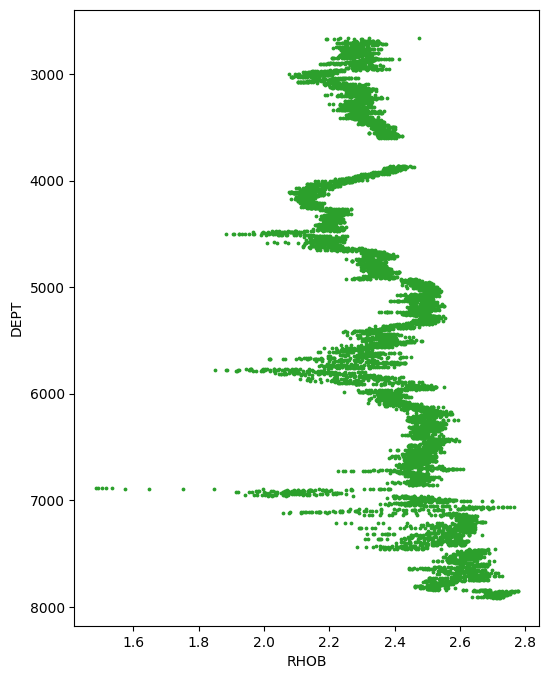

In [ ]:
plt.figure(figsize=(6,8))
plt.scatter(df.RHOB, df.index, s=3, c="tab:green")
plt.xlabel("RHOB")
plt.ylabel("DEPT")
# Invertendo o eixo Y (0 em cima, aumentando para baixo)
plt.gca().invert_yaxis()
plt.show()

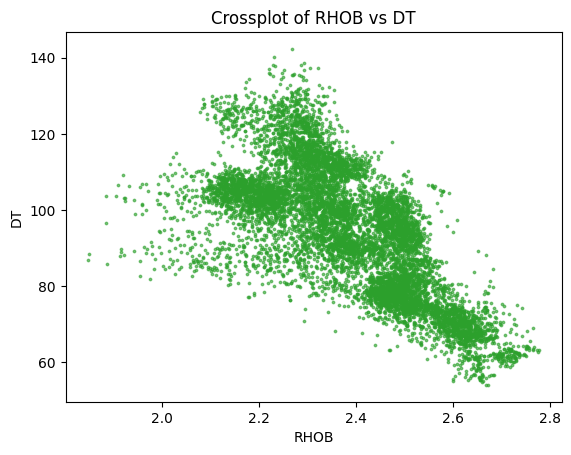

In [ ]:
 ## Novo grafico cruzado (crossplot) para verificar visualmente a relação entre os perfis sônico e densidade:
df_filtrado = df[df["RHOB"] >= 1.8]

plt.scatter(df_filtrado.RHOB, df_filtrado.DT, s=3, c="tab:green", alpha=0.6)
plt.xlabel('RHOB')
plt.ylabel('DT')
plt.title('Crossplot of RHOB vs DT')
plt.show()

### Comentário: Vamos aplicar a equação linear para encontrarmos uma reta que melhor represente o conjunto de dados acima;

1 - A vagarosidade (prefil sônico) pode ser determinado por meio da seguinte relação linear: $s(\rho)=a+b\,\rho\;$, em que $\rho$ é o perfil de densidades, $a$ e $b$ são os coeficientes linear e angular da equação da reta, respectivamente.

2 - Para usarmos a equação precisamos estimar os coeficientes a e b e para isso, usando o método dos mínimos quadrados lineares, cuja expressão matricial é:

$\mathbf{d} = \mathbf{G} \mathbf{m}$; e depois de algumas considerações chegamos a: $ \mathbf{m} = (\mathbf{G}^T\mathbf{G})^{-1} \mathbf{G}^T \mathbf{d}$,




3 - Para calcularmos um polinômio de mais alto grau como esse, vamos seguir os cálculos abaixo:
$$s(\rho) = a_0 + b_1\,\rho + b_2\,\rho^2 + b_3\,\rho^3 + \cdots + b_N\,\rho^N$$


\begin{pmatrix}
\frac{∂s_1(\rho)}{∂a} &  \frac{∂s_1(\rho)}{∂b} \\
\frac{∂s_2(\rho)}{∂a} &  \frac{∂s_2(\rho)}{∂b}  \\
\vdots &  \vdots \\
\frac{∂s_N(\rho)}{∂a} &  \frac{∂s_N(\rho)}{∂b}
\end{pmatrix} ,

por isso a dimensão de $\mathbf{G}$ é (N x M), em que N=número de dados (i.e., o tamanho do perfil de densidade), M = número de parametros do modelo (i.e., a e b neste caso).



In [ ]:
# Primeiro precisamos dividir os dados para treinamento (80%) e teste (20%)
df_80 = df_filtrado.sample(frac=0.8, random_state=42)
df_20 = df_filtrado.sample(frac=0.2, random_state=42)

# --- Dados observados ---
rho = df_filtrado.RHOB.values
d   = df_filtrado.DT.values
depth = df_filtrado.index.values  # se o índice é a profundidade

# --- Dados de treinamento ---
rho_train = df_80.RHOB.values
d_train   = df_80.DT.values

# --- Dados de teste ---
rho_test = df_20.RHOB.values
d_test   = df_20.DT.values

# --- Para os gráficos de perfil o dataset será esse, ou seja, completo ---
rho_full = df_filtrado.RHOB.values
d_full   = df_filtrado.DT.values
depth    = df_filtrado.index.values

# Existem diferentes maneiras de medir o erro. Se p_n são valores previstos e v_n são valores reais,
# a regressão linear clássica usa o método de desajuste dos mínimos quadrados.
# O erro quadrático médio (root-mean-square, em inglês) é definico como:
# phi_rms = sqrt (1/N sum(p_n - v_n)^2.

def rms(pred, obs):
    return np.sqrt(np.mean((pred - obs)**2))

def phi_train_test(grau):
    coef = np.polyfit(df_80.RHOB.values, df_80.DT.values, grau)
    phi_tr = rms(np.polyval(coef, df_80.RHOB.values), df_80.DT.values)
    phi_te = rms(np.polyval(coef, df_20.RHOB.values), df_20.DT.values)
    return phi_tr, phi_te


In [ ]:
# montagem da matriz de sensiblidade do problema:
# G é a matriz de derivadas do modelo!

# =========================================================
# MODELO LINEAR: # s(ρ) = a + b*ρ
# =========================================================
G_linear = np.array([np.ones(len(rho)), rho]).T
m_linear = np.linalg.inv(G_linear.T @ G_linear) @ G_linear.T @ d
a_linear, b_linear = m_linear
d_pred_linear = G_linear @ m_linear
RMS_linear = rms(d_pred_linear, d)
print(f"Modelo Linear =>>> DT = {a_linear:.3f} + {b_linear:.3f}·ρ | φ_linear = {RMS_linear:.4f}")

Modelo Linear =>>> DT = 274.525 + -75.587·ρ | φ_linear = 11.6366


In [ ]:
# =========================================================
# 1) MODELO LINEAR: s(ρ) = a + b·ρ  (AJUSTE NO TREINO)
# =========================================================
G_linear_tr = np.column_stack([np.ones_like(rho_train), rho_train])
m_linear = np.linalg.inv(G_linear_tr.T @ G_linear_tr) @ (G_linear_tr.T @ d_train)
a_linear, b_linear = m_linear

# Predições
d_pred_linear_train = a_linear + b_linear * rho_train
d_pred_linear_test  = a_linear + b_linear * rho_test
d_pred_linear       = a_linear + b_linear * rho_full   # para o gráfico de perfil

# RMS treino e teste
RMS_linear_train = rms(d_pred_linear_train, d_train)
RMS_linear_test  = rms(d_pred_linear_test,  d_test)

print(f"Modelo Linear => DT = {a_linear:.3f} + {b_linear:.3f}·ρ "
      f"| φ_treino = {RMS_linear_train:.4f} | φ_teste = {RMS_linear_test:.4f}")


Modelo Linear => DT = 273.771 + -75.279·ρ | φ_treino = 11.6904 | φ_teste = 11.6119


In [ ]:
# montagem da matriz de sensiblidade do problema:
# G é a matriz de derivadas do modelo!

# =========================================================
# MODELO QUADRÁTICO: s(ρ) = a + b*ρ + c*ρ^2
# =========================================================
G_quadratico = np.column_stack([np.ones_like(rho), rho, rho**2])
m_quadratico, *_ = np.linalg.lstsq(G_quadratico, d, rcond=None)
a_q, b_q, c_q = m_quadratico
d_pred_quadratico = G_quadratico @ m_quadratico
RMS_quadratico = rms(d_pred_quadratico, d)
print(f" Modelo Quadrático =>>> DT = {a_q:.3f} + {b_q:.3f}·ρ + {c_q:.3e}·ρ² | RMS = {RMS_quadratico:.4f}")


 Modelo Quadrático =>>> DT = -703.269 + 751.045·ρ + -1.740e+02·ρ² | RMS = 10.5280


In [ ]:
# =========================================================
# 2) MODELO QUADRÁTICO: s(ρ) = a + b·ρ + c·ρ²  (AJUSTE NO TREINO)
# =========================================================
G_quad_tr = np.column_stack([np.ones_like(rho_train), rho_train, rho_train**2])
m_quadratico, *_ = np.linalg.lstsq(G_quad_tr, d_train, rcond=None)
a_q, b_q, c_q = m_quadratico

# Predições
d_pred_quadratico_train = a_q + b_q * rho_train + c_q * (rho_train**2)
d_pred_quadratico_test  = a_q + b_q * rho_test  + c_q * (rho_test**2)
d_pred_quadratico       = a_q + b_q * rho_full  + c_q * (rho_full**2)  # para o perfil

# RMS treino e teste
RMS_quadratico_train = rms(d_pred_quadratico_train, d_train)
RMS_quadratico_test  = rms(d_pred_quadratico_test,  d_test)

print(f"Modelo Quadrático => DT = {a_q:.3f} + {b_q:.3f}·ρ + {c_q:.3e}·ρ² "
      f"| φ_treino = {RMS_quadratico_train:.4f} | φ_teste = {RMS_quadratico_test:.4f}")


Modelo Quadrático => DT = -714.595 + 760.675·ρ + -1.760e+02·ρ² | φ_treino = 10.5495 | φ_teste = 10.5607


In [ ]:
# =========================================================
# MODELO GRAU 3: s(ρ) = a + b*ρ + c*ρ^2 + d*ρ^3
# =========================================================
G_cubo = np.column_stack([np.ones_like(rho), rho, rho**2, rho**3])
m_cubo, *_ = np.linalg.lstsq(G_cubo, d, rcond=None)
a3, b3, c3, d3 = m_cubo
d_pred_cubo = G_cubo @ m_cubo
RMS_cub = rms(d_pred_cubo, d)
print(f"Modelo de Grau 3 =>>> DT = {a3:.3f} + {b3:.3f}·ρ + {c3:.3e}·ρ² + {d3:.3e}·ρ³ | RMS = {RMS_cub:.3f}")


Modelo de Grau 3 =>>> DT = -4584.875 + 5707.847·ρ + -2.276e+03·ρ² + 2.962e+02·ρ³ | RMS = 10.349


In [ ]:
# =========================================================
# MODELO GRAU 3: s(ρ) = a + b·ρ + c·ρ² + d·ρ³  (AJUSTE NO TREINO)
# =========================================================
G_cubo_tr = np.column_stack([
    np.ones_like(rho_train),
    rho_train,
    rho_train**2,
    rho_train**3
])

# Ajuste (mínimos quadrados com treino)
m_cubo, *_ = np.linalg.lstsq(G_cubo_tr, d_train, rcond=None)
a3, b3, c3, d3 = m_cubo

# Predições
d_pred_cubo_train = a3 + b3*rho_train + c3*(rho_train**2) + d3*(rho_train**3)
d_pred_cubo_test  = a3 + b3*rho_test  + c3*(rho_test**2)  + d3*(rho_test**3)
d_pred_cubo       = a3 + b3*rho_full  + c3*(rho_full**2)  + d3*(rho_full**3)  # para o perfil

# RMS treino e teste
RMS_cub_train = rms(d_pred_cubo_train, d_train)
RMS_cub_test  = rms(d_pred_cubo_test,  d_test)

print(f"Modelo de Grau 3 => DT = {a3:.3f} + {b3:.3f}·ρ + {c3:.3e}·ρ² + {d3:.3e}·ρ³ "
      f"| φ_treino = {RMS_cub_train:.4f} | φ_teste = {RMS_cub_test:.4f}")


Modelo de Grau 3 => DT = -4535.311 + 5641.476·ρ + -2.247e+03·ρ² + 2.919e+02·ρ³ | φ_treino = 10.3772 | φ_teste = 10.3851


Para calcular o grau N o Python tem uma biblioteca de matrix chamada => "Vandermonder".

```
rho = np.array([2, 3, 4])
G = np.vander(rho, 4, increasing=True)  # 4 colunas → ρ^0, ρ^1, ρ^2, ρ^3

Saída:
[[ 1  2  4   8]
 [ 1  3  9  27]
 [ 1  4 16  64]]
```

Parâmetro increasing=True
Por padrão, np.vander() monta as potências do maior para o menor (ρ³, ρ², ρ¹, ρ⁰). Mas, ao usar increasing=True, ela monta do menor para o maior (ρ⁰, ρ¹, ρ², ρ³), que é exatamente o formato esperado na equação: Gm=d.

##MAS.....aqui no exercício vou usar um loop normal!


###$$s(\rho) = a_0 + b_1\,\rho + b_2\,\rho^2 + b_3\,\rho^3 + \cdots + b_N\,\rho^N$$

In [ ]:
# =========================================================
# MODELO GRAU N (genérico):
# =========================================================
N = 5  # grau desejado

# Matriz G_N sem vander (broadcasting): colunas [ρ^0, ρ^1, ..., ρ^N]
Grau_N = rho[:, None] ** np.arange(N + 1)

# Ajuste por mínimos quadrados (estável)
m_N, *_ = np.linalg.lstsq(Grau_N, d, rcond=None)

# Predição e RMS
d_pred_N = Grau_N @ m_N
RMS_N = rms(d_pred_N, d)

print(f"[Grau {N}] | RMS = {RMS_N:.4f}")
print("Coeficientes (a0, b1, ..., bN):")
print(np.array2string(m_N, precision=2, separator=", "))

p = np.poly1d(m_N[::-1])
print("\nPolinômio (ordem decrescente para poly1d):")
print(p)

[Grau 5] | RMS = 10.2257
Coeficientes (a0, b1, ..., bN):
[ 111319.52, -232228.82,  192020.5 ,  -78583.2 ,   15917.77,   -1277.1 ]

Polinômio (ordem decrescente para poly1d):
       5             4             3            2
-1277 x + 1.592e+04 x - 7.858e+04 x + 1.92e+05 x - 2.322e+05 x + 1.113e+05


In [ ]:
# =========================================================
# MODELO GRAU N (genérico) — AJUSTE NO TREINO
# =========================================================
N = 5  # grau desejado

# Matriz de projeto no TREINO (colunas: [ρ^0, ρ^1, ..., ρ^N])
Grau_N_tr = rho_train[:, None] ** np.arange(N + 1)

# Ajuste por mínimos quadrados no TREINO
m_N, *_ = np.linalg.lstsq(Grau_N_tr, d_train, rcond=None)

# Predições (treino, teste e perfil completo)
d_pred_N_train = (rho_train[:, None] ** np.arange(N + 1)) @ m_N
d_pred_N_test  = (rho_test[:,  None] ** np.arange(N + 1)) @ m_N
d_pred_N       = (rho_full[:,  None] ** np.arange(N + 1)) @ m_N   # para o perfil

# RMS em treino e teste
RMS_N_train = rms(d_pred_N_train, d_train)
RMS_N_test  = rms(d_pred_N_test,  d_test)

print(f"[Grau {N}] | φ_treino = {RMS_N_train:.4f} | φ_teste = {RMS_N_test:.4f}")
print("Coeficientes (a0, b1, ..., bN):")
print(np.array2string(m_N, precision=2, separator=", "))

# polinômio legível (ordem decrescente para poly1d)
p = np.poly1d(m_N[::-1])
print("\nPolinômio (ordem decrescente para poly1d):")
print(p)


[Grau 5] | φ_treino = 10.2552 | φ_teste = 10.2770
Coeficientes (a0, b1, ..., bN):
[ 116012.22, -241943.78,  200049.59,  -81895.23,   16599.83,   -1333.21]

Polinômio (ordem decrescente para poly1d):
       5            4            3         2
-1333 x + 1.66e+04 x - 8.19e+04 x + 2e+05 x - 2.419e+05 x + 1.16e+05


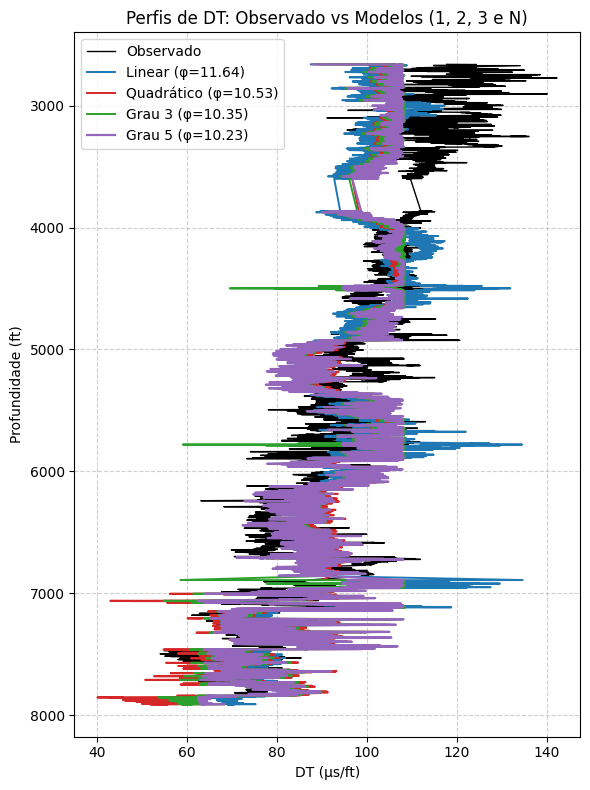

In [ ]:
# ================================
# GRÁFICO 1 — Perfis DT x Profundidade
# ================================
plt.figure(figsize=(6,8))
plt.plot(d,                 depth, lw=1.0,  c='k',          label='Observado')
plt.plot(d_pred_linear,     depth, lw=1.4,  c='tab:blue',   label=f'Linear (φ={RMS_linear:.2f})')
plt.plot(d_pred_quadratico, depth, lw=1.4,  c='tab:red',    label=f'Quadrático (φ={RMS_quadratico:.2f})')
plt.plot(d_pred_cubo,       depth, lw=1.4,  c='tab:green',  label=f'Grau 3 (φ={RMS_cub:.2f})')
plt.plot(d_pred_N,          depth, lw=1.6,  c='tab:purple', label=f'Grau {N} (φ={RMS_N:.2f})')

plt.gca().invert_yaxis()
plt.xlabel("DT (µs/ft)")
plt.ylabel("Profundidade (ft)")
plt.title("Perfis de DT: Observado vs Modelos (1, 2, 3 e N)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

plt.show()

## Interpretação do GRÁFICO φ×N plotado abaixo :
φ_treino sempre diminui com o aumento de 𝑁,
porque modelos mais complexos sempre ajustam melhor os dados que já viram.

φ_teste, porém, diminui até certo ponto (melhor generalização) e depois aumenta, sendo um sinal clássico de overfitting.

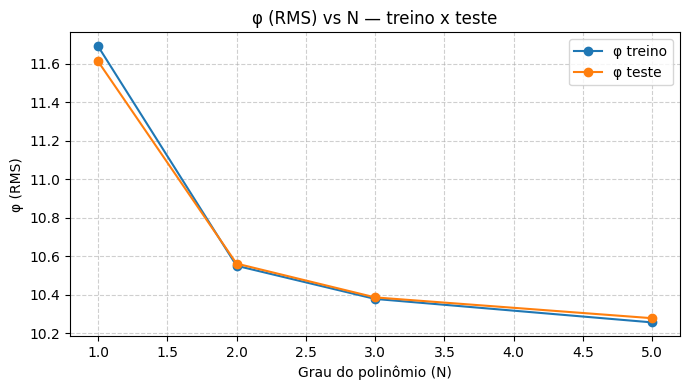

In [ ]:
# GRÁFICO φ×N
graus = [1, 2, 3, N]
phi_tr, phi_te = np.array([phi_train_test(g) for g in graus]).T
plt.figure(figsize=(7,4))
plt.plot(graus, phi_tr, marker='o', label='φ treino')
plt.plot(graus, phi_te, marker='o', label='φ teste')
plt.xlabel("Grau do polinômio (N)")
plt.ylabel("φ (RMS)")
plt.title("φ (RMS) vs N — treino x teste")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## <span style="color:red">Atividade 2</span>

### Será que podemos melhorar o ajuste adicionando outros perfis na regressão, conforme formulado abaixo?

### $$s(l_1,l_2,\cdots,l_N) = a_0 + b_1\,l_1 + b_2\,l_2  + \cdots + b_N\,l_N$$

### Faça uma pequena análise das covariancias entre os perfis escolhidos. Aqueles com maior covariancia devem ser os utilizados na regressão.

In [ ]:
df_filtrado.columns


Index(['SP', 'ILD', 'ILM', 'LL8', 'GR', 'CALI', 'DRHO', 'RHOB', 'NPHI', 'DT'], dtype='object')

Matriz de Covariância:
          RHOB          GR        NPHI        ILD          DT
RHOB  0.023395   -0.437714   -1.659486   0.400046   -1.768332
GR   -0.437714  564.905463  153.315032 -36.467237  143.401505
NPHI -1.659486  153.315032  192.215761 -42.624658  194.295244
ILD   0.400046  -36.467237  -42.624658  30.062807  -48.702360
DT   -1.768332  143.401505  194.295244 -48.702360  269.087714


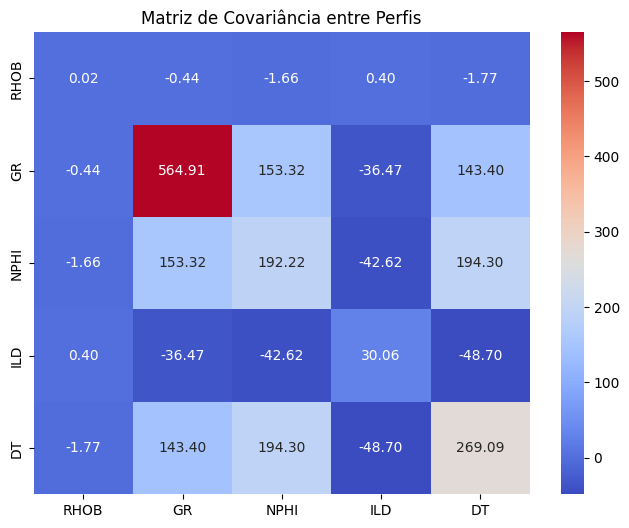


Matriz de Correlação:
          RHOB        GR      NPHI       ILD        DT
RHOB  1.000000 -0.120405 -0.782565  0.477019 -0.704787
GR   -0.120405  1.000000  0.465267 -0.279834  0.367806
NPHI -0.782565  0.465267  1.000000 -0.560727  0.854320
ILD   0.477019 -0.279834 -0.560727  1.000000 -0.541487
DT   -0.704787  0.367806  0.854320 -0.541487  1.000000


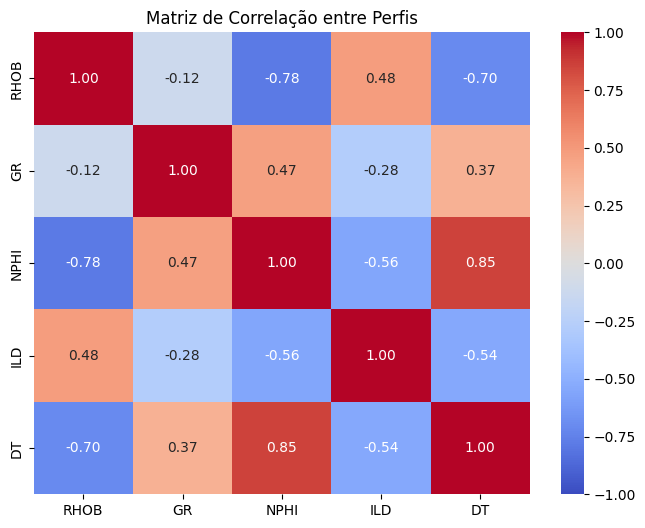

In [ ]:
import seaborn as sns

# Selecionar apenas as variáveis numéricas
perf = df_filtrado[['RHOB', 'GR', 'NPHI', 'ILD', 'DT']].dropna()

# Matriz de covariância
cov_matrix = perf.cov()
print("Matriz de Covariância:")
print(cov_matrix)

# Visualização como mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Covariância entre Perfis")
plt.show()

# Ou, de forma mais interpretável, correlação normalizada:
corr_matrix = perf.corr()
print("\nMatriz de Correlação:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de Correlação entre Perfis")
plt.show()


A **matriz de covariância** mostra a variação conjunta entre duas variáveis. Valores altos (em módulo) indicam que quando uma sobe, a outra tende a subir ou descer também. **A covariância depende da escala das variáveis** e como GR tem valores muito maiores do que RHOB, então é melhor usarmos o gráfico de **correlação** para comparar as diferentes variáveis. E de acordo com os resultados acima, posso ver que **NPHI e RHOB** como principais perfis preditores (**eles têm as maiores correlações em módulo com DT**).

In [ ]:
# =========================================================
# MODELO MÚLTIPLO COM AS DUAS VARIÁVEIS MAIS SIGNIFICATIVAS
# s(ρ, φ) = a0 + b1·RHOB + b2·NPHI
# =========================================================

# --- Dados de treino e teste ---
X_train = df_80[['RHOB', 'NPHI']].values
y_train = df_80['DT'].values

X_test = df_20[['RHOB', 'NPHI']].values
y_test = df_20['DT'].values

# --- Matriz de projeto com intercepto (treino) ---
G_train = np.column_stack([np.ones(len(X_train)), X_train])

# --- Ajuste por mínimos quadrados no treino ---
m_multi, *_ = np.linalg.lstsq(G_train, y_train, rcond=None)
a0, b1, b2 = m_multi

print(f"Modelo Múltiplo => DT = {a0:.3f} + {b1:.3f}·RHOB + {b2:.3f}·NPHI")

# --- Predições ---
# treino
y_pred_train = G_train @ m_multi
# teste
G_test = np.column_stack([np.ones(len(X_test)), X_test])
y_pred_test = G_test @ m_multi
# perfil completo (para o gráfico)
G_full = np.column_stack([np.ones(len(df_filtrado)), df_filtrado[['RHOB', 'NPHI']].values])
d_pred_multi = G_full @ m_multi

# --- RMS treino e teste ---
RMS_multi_train = rms(y_pred_train, y_train)
RMS_multi_test  = rms(y_pred_test,  y_test)

print(f"φ_treino = {RMS_multi_train:.4f} | φ_teste = {RMS_multi_test:.4f}")



Modelo Múltiplo => DT = 81.228 + -9.542·RHOB + 0.929·NPHI
φ_treino = 8.4911 | φ_teste = 8.5293


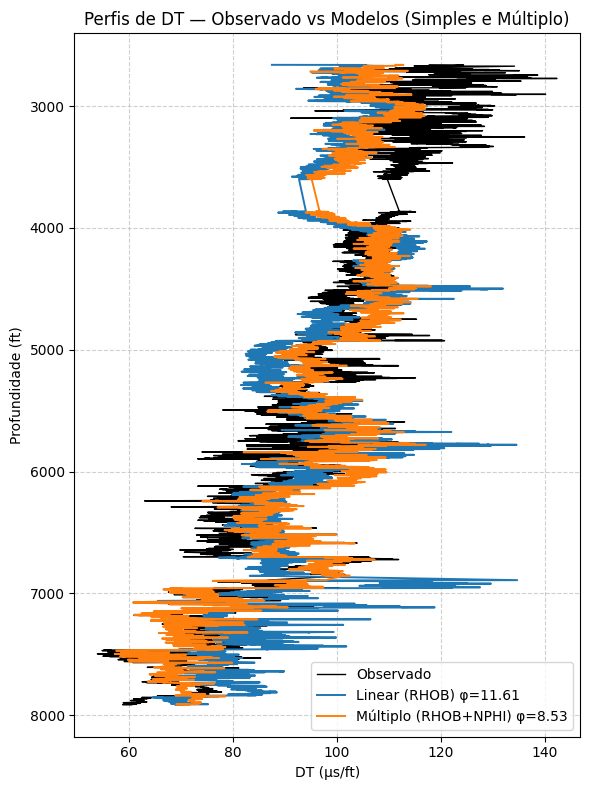

In [ ]:
# =========================================================
# GRÁFICO — Perfis DT x Profundidade (Comparação)
# =========================================================

plt.figure(figsize=(6,8))
plt.plot(d_full, depth, lw=1.0, c='k', label='Observado')
plt.plot(d_pred_linear, depth, lw=1.4, c='tab:blue', label=f'Linear (RHOB) φ={RMS_linear_test:.2f}')
plt.plot(d_pred_multi,  depth, lw=1.4, c='tab:orange', label=f'Múltiplo (RHOB+NPHI) φ={RMS_multi_test:.2f}')

plt.gca().invert_yaxis()
plt.xlabel("DT (µs/ft)")
plt.ylabel("Profundidade (ft)")
plt.title("Perfis de DT — Observado vs Modelos (Simples e Múltiplo)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


A linha **preta** ACIMA é o perfil real (DT).

A **azul** é o modelo linear simples, que tende a capturar a tendência geral.

A **laranja** é o modelo múltiplo com RHOB + NPHI. Deve seguir melhor o perfil, especialmente nas zonas onde o DT varia com a porosidade.

Como a curva **laranja** **ESTÁ** mais próxima da preta, **então o ajuste realmente melhorou ao incluir NPHI.**

## <span style="color:red">Atividade  3</span>

### Continue com a abordagem linear e agora tente melhorar os resultados usando a equação de Gadner para relacionar densidades e velocidades:

### $$\rho = \alpha\,v^{\beta}\;,$$ ,

###em que $\alpha$ e $\beta$ dependem da litologia envolvida. Veja as dicas:


###* Tente predizer a velocity (1/$DT$) ao inves de trabalhar diretamente com a vagarosidade;
###* Aplicando logaritimos em ambos os lados da equação de Gardner, tem-se:
###$$\log \rho = \log{\alpha} + \beta\,v\ = \log{\alpha} - \beta\,s\;.$$


###* Dessa forma você precisa usar a função log do perfil de densidades ($\rho$) na regressão linear.

### Abaixo deixei uma função implementada para seu uso, caso queira. Bom trabalho!

O objetivo é obter o perfil de velocidade 1/s a partir dos dados de densidade e da relação de Gardner.


In [ ]:
import numpy as np
def Regressao_Polinomial(x,y,M):
    # x = vetor de termos independentes;
    # y = vetor de dados observados

    # Matriz de sensibilidade:
    N = len(y)
    G = np.zeros((N,M+1))
    for i in range(M+1):
        G[:,i] = x**i

    # calculando o vetor de parametros:
    m = np.linalg.solve(G.T@G,G.T@y)

    return m

# O objetivo é: ajustar log (𝜌) = log (𝛼) + 𝛽 log ⁡(𝑣) usando seus perfis DT e RHOB, e depois predizer o perfil de velocidade 𝑣 = 1/s.

In [ ]:
# Atividade 3
rho = df_filtrado["RHOB"].values
DT  = df_filtrado["DT"].values
depth = df_filtrado.index.values

# Remover valores não físicos
mask = (rho > 0) & (DT > 0)
rho = rho[mask]
DT  = DT[mask]
depth = depth[mask]

# Converter vagarosidade (s = DT) para velocidade v = 1/DT
v_obs = 1.0/DT   # (ft/µs)

# ----------------------------------------
# AJUSTE DE GARDNER
# log(ρ) = log(α) + β·log(v)
# ----------------------------------------
y = np.log(rho)
x = np.log(v_obs)

# Matriz de projeto [1, ln(v)]
G = np.column_stack([np.ones_like(x), x])
print(G)

# Ajuste linear
m, *_ = np.linalg.lstsq(G, y, rcond=None)
ln_alpha, beta = m
alpha = np.exp(ln_alpha)

print(f"Equação de Gardner ajustada:")
print(f"ln(ρ) = {ln_alpha:.4f} + {beta:.4f}·ln(v)")
print(f"ρ = {alpha:.6f} · v^{beta:.4f}")

# ----------------------------------------
# PREDIÇÃO DE VELOCIDADE A PARTIR DE ρ
# v = exp((ln(ρ) - ln(α)) / β)
# ----------------------------------------
v_pred = np.exp((np.log(rho) - ln_alpha) / beta)

# ----------------------------------------
# ERRO RMS
# ----------------------------------------
def rms(a, b):
    return np.sqrt(np.mean((a - b)**2))

phi_v = rms(v_pred, v_obs)
print(f"Erro RMS (φ_v) = {phi_v:.6f} ft/µs")

[[ 1.         -4.76875565]
 [ 1.         -4.78612414]
 [ 1.         -4.80562058]
 ...
 [ 1.         -4.07770184]
 [ 1.         -4.09058249]
 [ 1.         -4.10428334]]
Equação de Gardner ajustada:
ln(ρ) = 2.0187 + 0.2544·ln(v)
ρ = 7.528850 · v^0.2544
Erro RMS (φ_v) = 0.001782 ft/µs


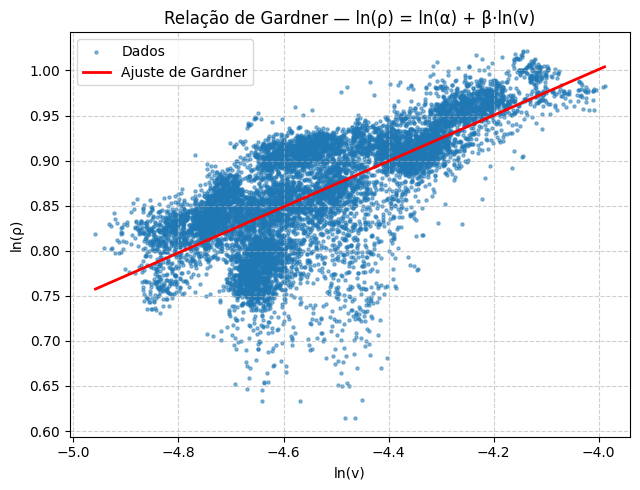

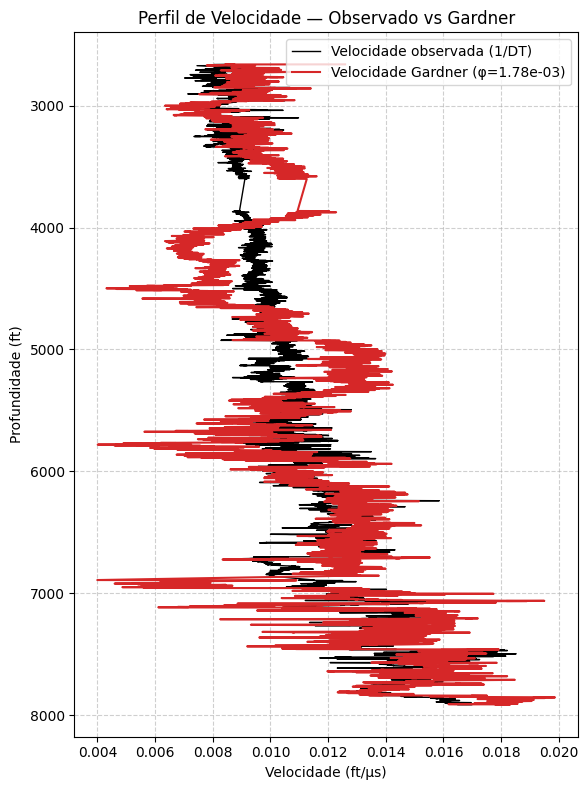

In [ ]:
# ----------------------------------------
# GRÁFICO 1: Crossplot ln(ρ) vs ln(v)
# ----------------------------------------
x_plot = np.linspace(x.min(), x.max(), 200)
y_plot = ln_alpha + beta * x_plot

plt.figure(figsize=(6.5,5))
plt.scatter(x, y, s=5, alpha=0.5, label="Dados")
plt.plot(x_plot, y_plot, 'r', lw=2, label="Ajuste de Gardner")
plt.xlabel("ln(v)")
plt.ylabel("ln(ρ)")
plt.title("Relação de Gardner — ln(ρ) = ln(α) + β·ln(v)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# ----------------------------------------
# GRÁFICO 2: Perfil de velocidade
# ----------------------------------------
plt.figure(figsize=(6,8))
plt.plot(v_obs, depth, lw=1.0, c='k', label="Velocidade observada (1/DT)")
plt.plot(v_pred, depth, lw=1.5, c='tab:red', label=f"Velocidade Gardner (φ={phi_v:.2e})")
plt.gca().invert_yaxis()
plt.xlabel("Velocidade (ft/µs)")
plt.ylabel("Profundidade (ft)")
plt.title("Perfil de Velocidade — Observado vs Gardner")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Os gráficos ACIMA mostram que a linha de ajuste (**vermelha GRÁFICO 1: Crossplot ln(ρ) vs ln(v)**) segue bem a tendência dos pontos no espaço log-log, e o perfil v_pred (**GRÁFICO 2: Perfil de velocidade**), acompanha bem o v_obs 1/DT, então a relação empírica de Gardner está válida para os dados deste poço.


# FIM!